In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
DATA_PATH = 'data/'

In [3]:
images = [cv2.imread(os.path.join(DATA_PATH, img_name)) for img_name in os.listdir(DATA_PATH)]

In [4]:
def create_saliency_map(saliency, img):
    (success, saliency_map) = saliency.computeSaliency(img)
    if success:
        saliency_map = (saliency_map * 100).astype("uint8")
        return saliency_map
    else:
        raise Exception('Spectral saliency failed.')

def spectral_saliency(img):
    return create_saliency_map(cv2.saliency.StaticSaliencySpectralResidual_create(), img)

def fine_grained_saliency(img):
    return create_saliency_map(cv2.saliency.StaticSaliencyFineGrained_create(), img)

def threshold_saliency_map(smap):
    return cv2.threshold(smap, 0, 100, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

/tmp/ipykernel_58732/3147937694.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Exception: Spectral saliency failed.

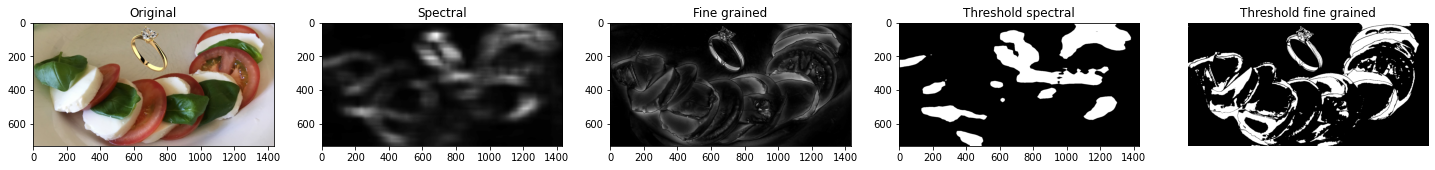

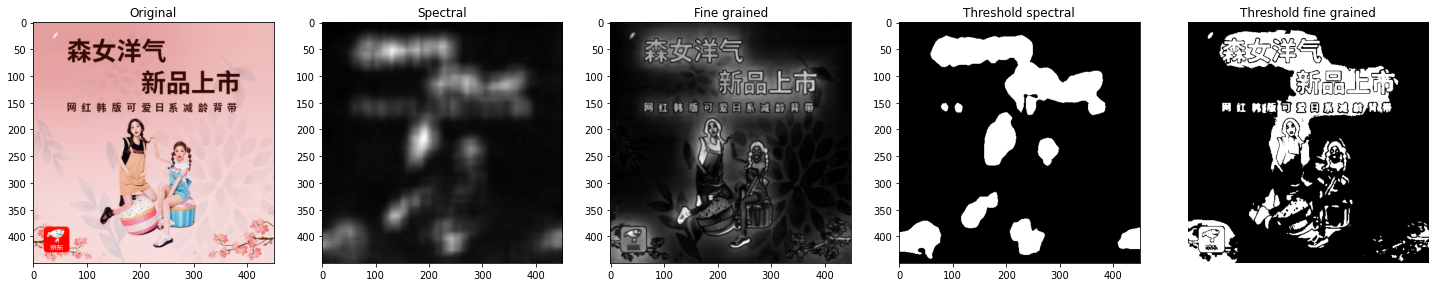

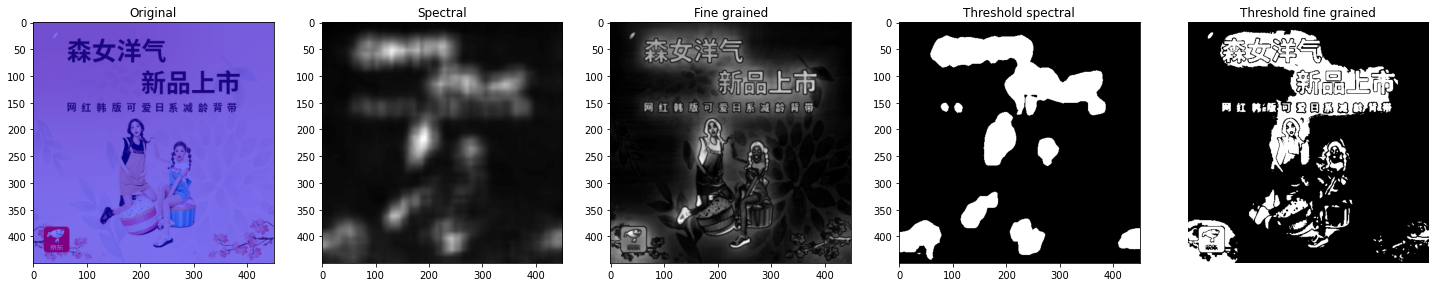

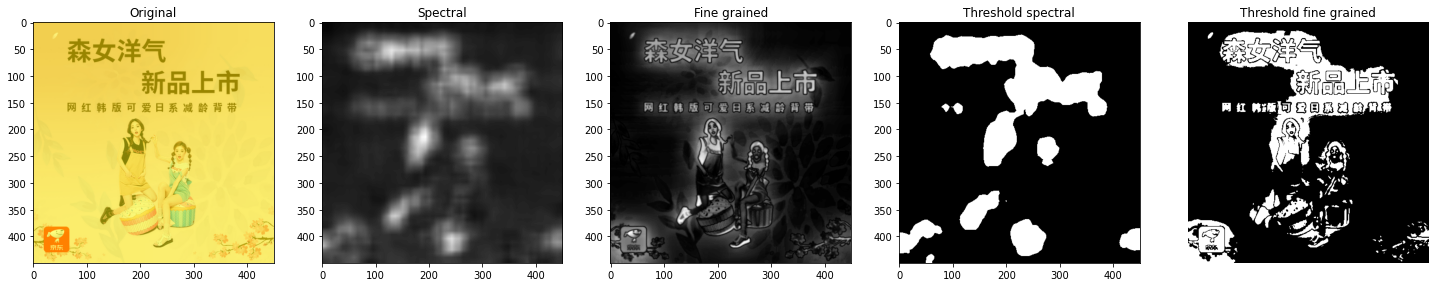

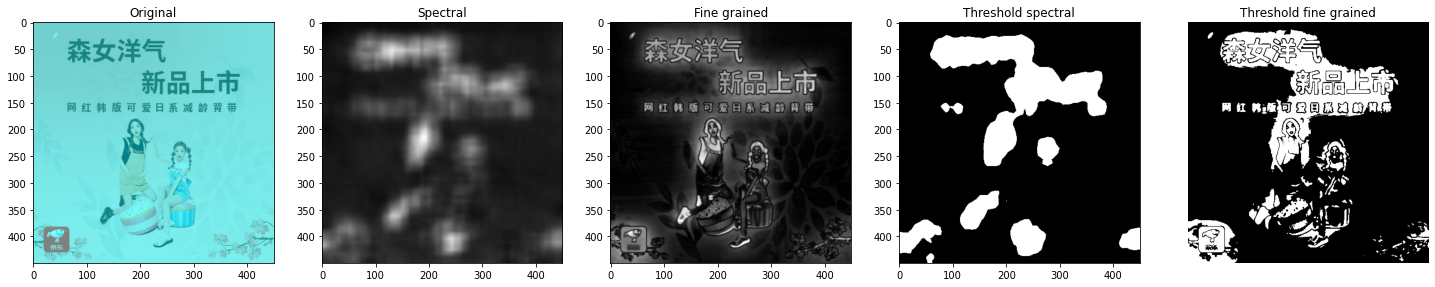

In [5]:
for img in images:
    spectral = spectral_saliency(img)
    fine_grained = fine_grained_saliency(img)
    thresh_spectral = threshold_saliency_map(spectral)
    thresh_finegrained = threshold_saliency_map(fine_grained)
    
    fig, axes = plt.subplots(1, 5, figsize=(25,25))
    plt.axis("off")
    axes[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axes[0].set_title("Original")
    for (idx, (title, smap)) in enumerate([('Spectral', spectral), ('Fine grained', fine_grained), ('Threshold spectral', thresh_spectral), ('Threshold fine grained', thresh_finegrained)]):
        axes[idx+1].imshow(smap, cmap='gray', vmin=0, vmax=100)
        axes[idx+1].set_title(title)
        
    fig.show()